In [2]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import pandas as pd
import nltk.data
import spacy


tokenizer = nltk.data.load('tokenizers/punkt/PY3/english.pickle')
stop_words = set(stopwords.words('english'))
nlp = spacy.load('en_core_web_sm')


def remove_city_newsletter(text):
    return re.sub(r"^[A-Za-z/,\s]+(?:\([A-Za-z]+\))?\s-\s", '', text)


def remove_html_caracters(text):
    html_special_chars_pattern = r'&[a-zA-Z0-9#]+;|<|>'
    return re.sub(html_special_chars_pattern,'',text)

def remove_links(text):
    return re.sub(r'http[s]?://\S+|pic\.twitter\.com/\S+', '', text)


def data_lematizing(text): 
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc]
)

def remove_hastags(text):
    return re.sub(r'#\S+', '', text)
  
def cleaning_data(text): #removing stopwords and digits and lowercasing them
    
    text = re.sub('\n', '', text)
    regex_date_username = r"((january|february|march|april|may|june|july|august|september|october|november|december)\s\d{1,2},\s\d{4}).*?@(?!realDonaldTrump)\w+"

    text = re.sub(regex_date_username,'', text, flags=re.IGNORECASE) #eliminarea datelor si numelor utilizatorilor
    text=remove_html_caracters(text)
    text=remove_city_newsletter(text)
    text=remove_links(text)
    text=remove_hastags(text)

    sentences=tokenizer.tokenize(text)

    text=" ".join(sentence for sentence in sentences if not sentence.startswith("Featured") )

    text = re.sub(r'[^\w\s]', '', text)  # elimin semnele de punctuatie
    text = re.sub(r"\d+", '', text)  # elimin cifrele
    
    return " ".join([w.lower() for w in text.split(" ") if w not in stop_words])


def data_tokenization(text): #functia de aici imi separa textul in cuvinte
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(text)

def preprocess_data(text):
    if isinstance(text, str):
        cleaned_data=cleaning_data(text)
        lematized_data=data_lematizing(cleaned_data)
        return lematized_data


D:\github\AI-examples\AI_examples\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import pandas as pd
df=pd.read_csv("data/fake_and_real_news.csv")

In [4]:
from tqdm import tqdm

tqdm.pandas()

df['clean_text'] = df['text'].progress_apply(preprocess_data)


100%|██████████| 44679/44679 [32:58<00:00, 22.59it/s]  


In [5]:
print(df[['clean_text','label']].sample(5))

                                              clean_text  label
40300  yesterday social medium buzz the huffington po...      0
24887  an africanamerican man make late night trip fr...      0
29766  last night saturday night live deliver brutal ...      0
7122   we presidentelect donald trump national securi...      1
21801  after seven year republican desperately try ki...      0


In [6]:
df.drop_duplicates() #eliminam duplicatele
df = df.dropna(subset=["clean_text"]) #elimin valorile care au coloana clean_text nula
df = df.sample(frac = 1)#dam suffle la date

In [7]:
df.to_csv("data/cleaned_data.csv")

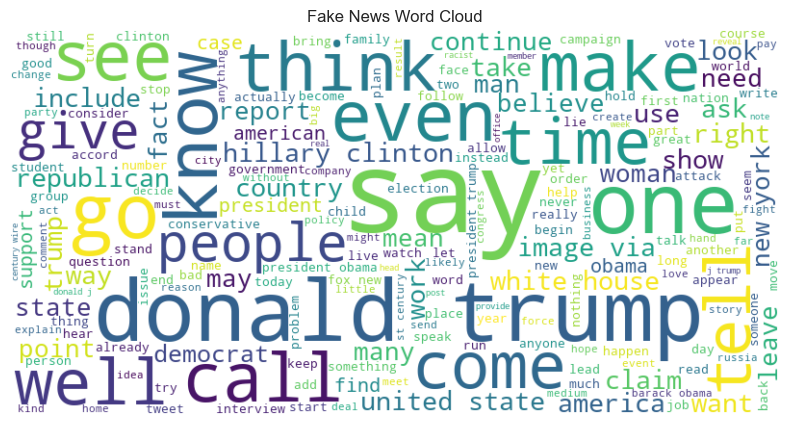

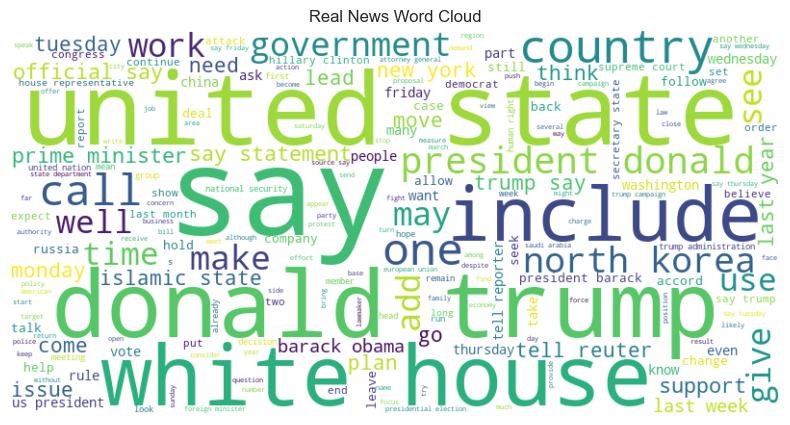

In [10]:
fake_news=df[df['label']==0]
real_news=df[df['label']==1]
text_fake_news = ' '.join(fake_news['clean_text'].astype(str).tolist())
text_real_news = ' '.join(real_news['clean_text'].astype(str).tolist())
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_fake_news)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig("./diagrams/wc_fn.png")
plt.title("Fake News Word Cloud")
plt.show()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_real_news)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Real News Word Cloud")
plt.savefig("./diagrams/wc_rn.png")
plt.show()